In [1]:
import sys
sys.path.append('..')

import simtools as st

In [2]:
datapath = '../data/'  # comment this line and uncomment the following line to use new data created with
# datapath = 'data/'   # the `create_data.ipynb` notebook in this directory

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# taken from: https://jfly.uni-koeln.de/color/
# distinguishable for colour deficient people
colors = [[0.        , 0.        , 0.        ],
          [0.        , 0.61960784, 0.45098039],
          [0.3372549 , 0.70588235, 0.91372549],
          [0.        , 0.44705882, 0.69803922],
          [0.90196078, 0.62352941, 0.        ],
          [0.83529412, 0.36862745, 0.        ],
          [0.8       , 0.4745098 , 0.65490196],
          [0.94117647, 0.89411765, 0.25882353],
]

In [5]:
markerstyles = [
    dict(marker='o'),
    dict(marker='s', fillstyle='none', markeredgewidth=1, linestyle='--'),
    dict(marker='s'),
    dict(marker='D', fillstyle='none', markeredgewidth=1, linestyle='--'),
    dict(marker='d', linestyle=(0, (2, 1))),
    dict(marker='D')
]
c = [colors[1]] + [colors[3]] * 2 + [colors[4]] * 3

# Figure 3a

In [6]:
data = pd.read_csv(datapath + 'figure3.csv')
data = data.sort_values(['length', 'expected_bp_number', 'initpattern'])
data_sel = data.loc[data['expected_config']]

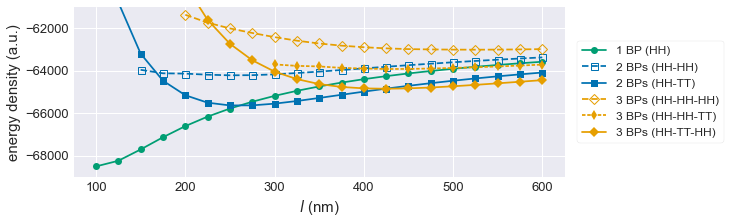

In [7]:
fig, ax = plt.subplots(1, figsize=(10, 3), constrained_layout=True)

for i, (p, l) in enumerate([['i', '1 BP (HH)'],
                            ['ii', '2 BPs (HH-HH)'],
                            ['io', '2 BPs (HH-TT)'],
                            ['iii', '3 BPs (HH-HH-HH)'],
                            ['iio', '3 BPs (HH-HH-TT)'],
                            ['ioi', '3 BPs (HH-TT-HH)']]):
    ax.plot(data_sel.loc[data['initpattern'] == p].sort_values('length')['length'].to_numpy(),
            data_sel.loc[data['initpattern'] == p].sort_values('length')['E_density'].to_numpy(),
            label=l,
            c=c[i],
            markeredgecolor=c[i],
            **markerstyles[i],
            #marker=symbols[i], markeredgecolor=colors[i+1], fillstyle='none', markeredgewidth=1
           )

ax.grid(True)
ax.set_xlabel(r'$l$ (nm)')
ax.set_ylabel('energy density (a.u.)')
ax.legend(frameon=True, facecolor='w', bbox_to_anchor=(1,0,.35,1), loc='center')
ax.set_ylim([-69000, -61000]);

# Figure 3e

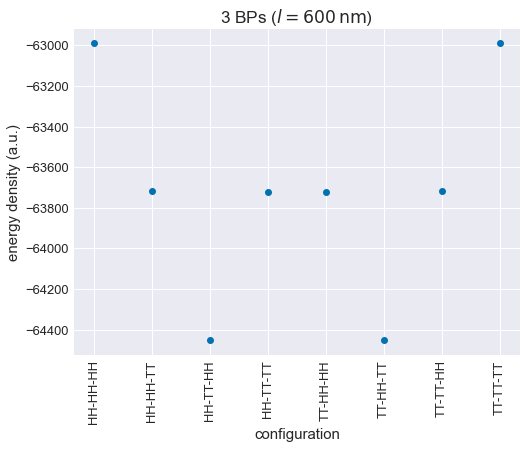

In [8]:
selection = data.loc[(data['length'] == 600) & (data['bp_number'] == 3)]
fig, ax = plt.subplots()

ax.plot(selection['initpattern'], selection['E_density'], 'o', c=colors[3])
ax.grid()
ax.set_xticks(['iii', 'iio', 'ioi', 'ioo', 'oii', 'oio', 'ooi', 'ooo'])
ax.set_xticklabels(['HH-HH-HH', 'HH-HH-TT', 'HH-TT-HH', 'HH-TT-TT', 'TT-HH-HH', 'TT-HH-TT', 'TT-TT-HH', 'TT-TT-TT'], rotation=90)
ax.set_xlabel('configuration')
ax.set_ylabel('energy density (a.u.)')
ax.set_title(r'3 BPs ($l=600\,\mathrm{nm}$)', size='xx-large');

# Figure 3f

In [9]:
eight_bps = pd.read_csv(datapath + 'eight_bps.csv')

In [10]:
n_steps = 7 - eight_bps['n_typechanges'].to_numpy()
E = eight_bps['E_density'].to_numpy()

In [11]:
fit_f = np.polynomial.Polynomial.fit(n_steps, E, deg=1)
xx = np.linspace(0,7,100)

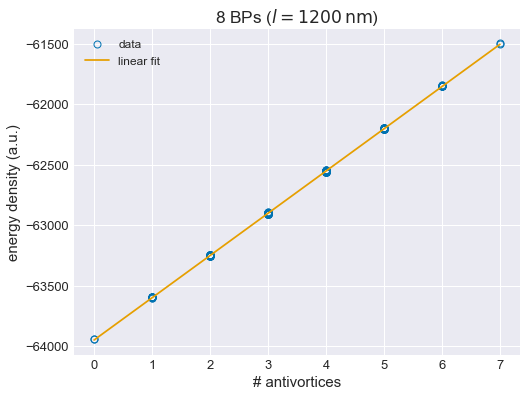

In [12]:
fig, ax = plt.subplots()

ax.plot(n_steps, E, 'o', label='data', c='none', markeredgecolor=colors[3], markeredgewidth=1)
ax.plot(xx, fit_f(xx), label='linear fit', c=colors[4])
ax.grid()
ax.set_xticks(range(8))
ax.legend()
ax.set_xlabel('# antivortices')
ax.set_ylabel('energy density (a.u.)')
ax.set_title(r'8 BPs ($l=1200\,\mathrm{nm}$)', size='xx-large');